### Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("coin_bitcoin.csv", index_col = 0)

### Data Pre-Processing

In [4]:
df.shape

(2991, 9)

There are 2991 rows and 9 columns in our dataset.

In [5]:
df.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')

In [6]:
df.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


#### Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 1 to 2991
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2991 non-null   object 
 1   Symbol     2991 non-null   object 
 2   Date       2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), object(3)
memory usage: 233.7+ KB


In [8]:
df.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

There are no missing values in the dataset, it is clean.

#### Duplicated Values

In [9]:
df[df.duplicated()]

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,


There are also no duplicated values.

#### Dropping Unnecessary Columns

To keep things simple, we will the drop name and date columns.

In [10]:
df.drop(["Name", "Symbol", "Date"], axis = 1, inplace = True)

In [11]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], dtype='object')

In [12]:
df.head()

,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,
1,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
3,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
4,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
5,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


### Statistical Measures

In [13]:
df.describe(include = 'all')

,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [14]:
def calculate_majority_moments(dataset):    
    """This function is responsible for calculating the majority moments (mean, median, standard deviation, skewness, and kurtosis)
       of the columns in the dataset"""
    majority_moments_df = {
        'Skewness': dataset.skew(),
        'Kurtosis': dataset.kurtosis(),
        'Mean': dataset.mean(),
        'Median': dataset.median(),
        'Standard Deviation': dataset.std()
    }
    
    majority_moments_df = pd.DataFrame(majority_moments_df)
    majority_moments_df.index.name = 'Column'
    
    return majority_moments_df

moments_df = calculate_majority_moments(df)
print("MAJORITY MOMENTS:")
display(moments_df)

MAJORITY MOMENTS:


,Skewness,Kurtosis,Mean,Median,Standard Deviation
Column,,,,,
High,3.012925,9.373806,6.893326e+03,2.387610e+03,1.164283e+04
Low,3.033504,9.666160,6.486010e+03,2.178500e+03,1.086903e+04
Open,3.025191,9.520448,6.700146e+03,2.269890e+03,1.128804e+04
Close,3.018634,9.474010,6.711290e+03,2.286410e+03,1.129814e+04
Volume,3.742112,38.480451,1.090633e+10,9.460360e+08,1.888895e+10
Marketcap,3.071752,9.731310,1.208761e+11,3.741503e+10,2.109438e+11


Before discussing the above numerical values, let's discuss what skewness and kurtosis are:

**Skewness:** It is used to measure the asymmetry of the distribution of values in a particular variable.
* If the value is 0, it indicates a perfect symmetrical distribution.
* If the value is greater than 0, it indicates a positively skewed distribution (right-skewed).
* If the value is less than 0, it indicates a negatively skewed distribution (left-skewed).

**Kurtosis:** It is used to measure the shape of the distribution and also describes the shape compared to a normal distribution.
* If the values is 0, it indicates that the distribution has the same peak as a normal distribution.
* If the value is greater than 0, it indicates that the distribution is more peaked (heavier tails) compared to a normal distribution.
* If the values is less than 0, it indicates that the distribution is flatter (lighter tails) compared to a normal distribution.

Let's now interpret the results of these values for a few columns:

**High:**
* Skewness: 3.012925 (slight positively skewed)
* Kurtosis: 9.373806 (more peaked than a normal distribution)

**Low:**
* Skewness: 3.033504 (slight positively skewed)
* Kurtosis: 9.666160 (more peaked than a normal distribution)
  
**Open:**
* Skewness: 3.025191 (slight positively skewed)
* Kurtosis: 9.520448  (more peaked than a normal distribution)

In summary, the distribution of the variables is the same for all except for the **Volumne** columns which is highly peaked compared to a normal distribution. We will apply log transformation to cater the skewness.

In [15]:
def apply_log_transformation(dataset):
    """This function applies log transformation to the columns in the dataset to tackle their skewness"""
    # apply log transformation to skewed columns
    for column in dataset.columns:
        dataset[column] = np.log1p(dataset[column])

    return dataset

unskewed_df = df.copy()
unskewed_df = apply_log_transformation(unskewed_df)
unskewed_df.skew()

Column
High         0.075176
Low          0.065855
Open         0.071727
Close        0.071238
Volume      -2.014645
Marketcap    0.030284
dtype: float64

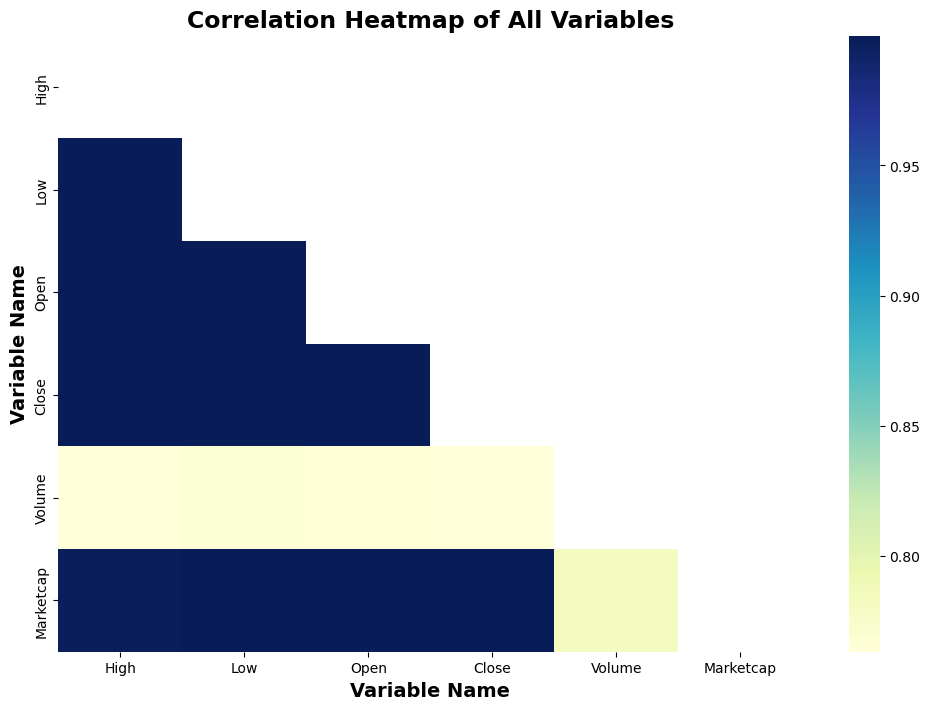

In [16]:
def statistical_correlation_heatmap(dataset):
    """This function plots a correlation heatmap of all columns present in the dataset"""
    corr = dataset.corr()
    
    # avoid redundancy by getting the lower portion of the heatmap only
    matrix = np.triu(corr)
    
    # build the heatmap
    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, annot=True, fmt=".2%", cmap="YlGnBu", mask=matrix)     # fmt=".2%" to display percentages
    plt.title("Correlation Heatmap of All Variables", fontsize=17, fontweight='bold')
    plt.xlabel("Variable Name", fontsize=14, fontweight='bold')
    plt.ylabel("Variable Name", fontsize=14, fontweight='bold')
    plt.savefig('1.Variables_Correlation_Heatmap.png', dpi=300)
    plt.show()

statistical_correlation_heatmap(unskewed_df)

In [17]:
corr = df.corr()
corr

Column,High,Low,Open,Close,Volume,Marketcap
Column,,,,,,
High,1.000000,0.998841,0.999442,0.999417,0.810464,0.999094
Low,0.998841,1.000000,0.998905,0.999291,0.803110,0.999072
Open,0.999442,0.998905,1.000000,0.998646,0.808439,0.998382
Close,0.999417,0.999291,0.998646,1.000000,0.807388,0.999709
Volume,0.810464,0.803110,0.808439,0.807388,1.000000,0.809156
Marketcap,0.999094,0.999072,0.998382,0.999709,0.809156,1.000000


The correlation measure also called as Pearson's measure, is a statistical measure which calculates the strength of direct relationship between variables in the range of-1 to 1.
* A value of 1 indicates a perfect positive correlation, that means if one variable would increase, the other would also.
* A value of-1 indicates a perfect negative correlation, that means if one variable would increase, the other would  drop.
* A value of 0 indicates no correlation between the variables.  

In our dataset, there's high and good correlation between all variables. 

### Data Visualization and EDA

#### Plotting the Distributions of All Columns

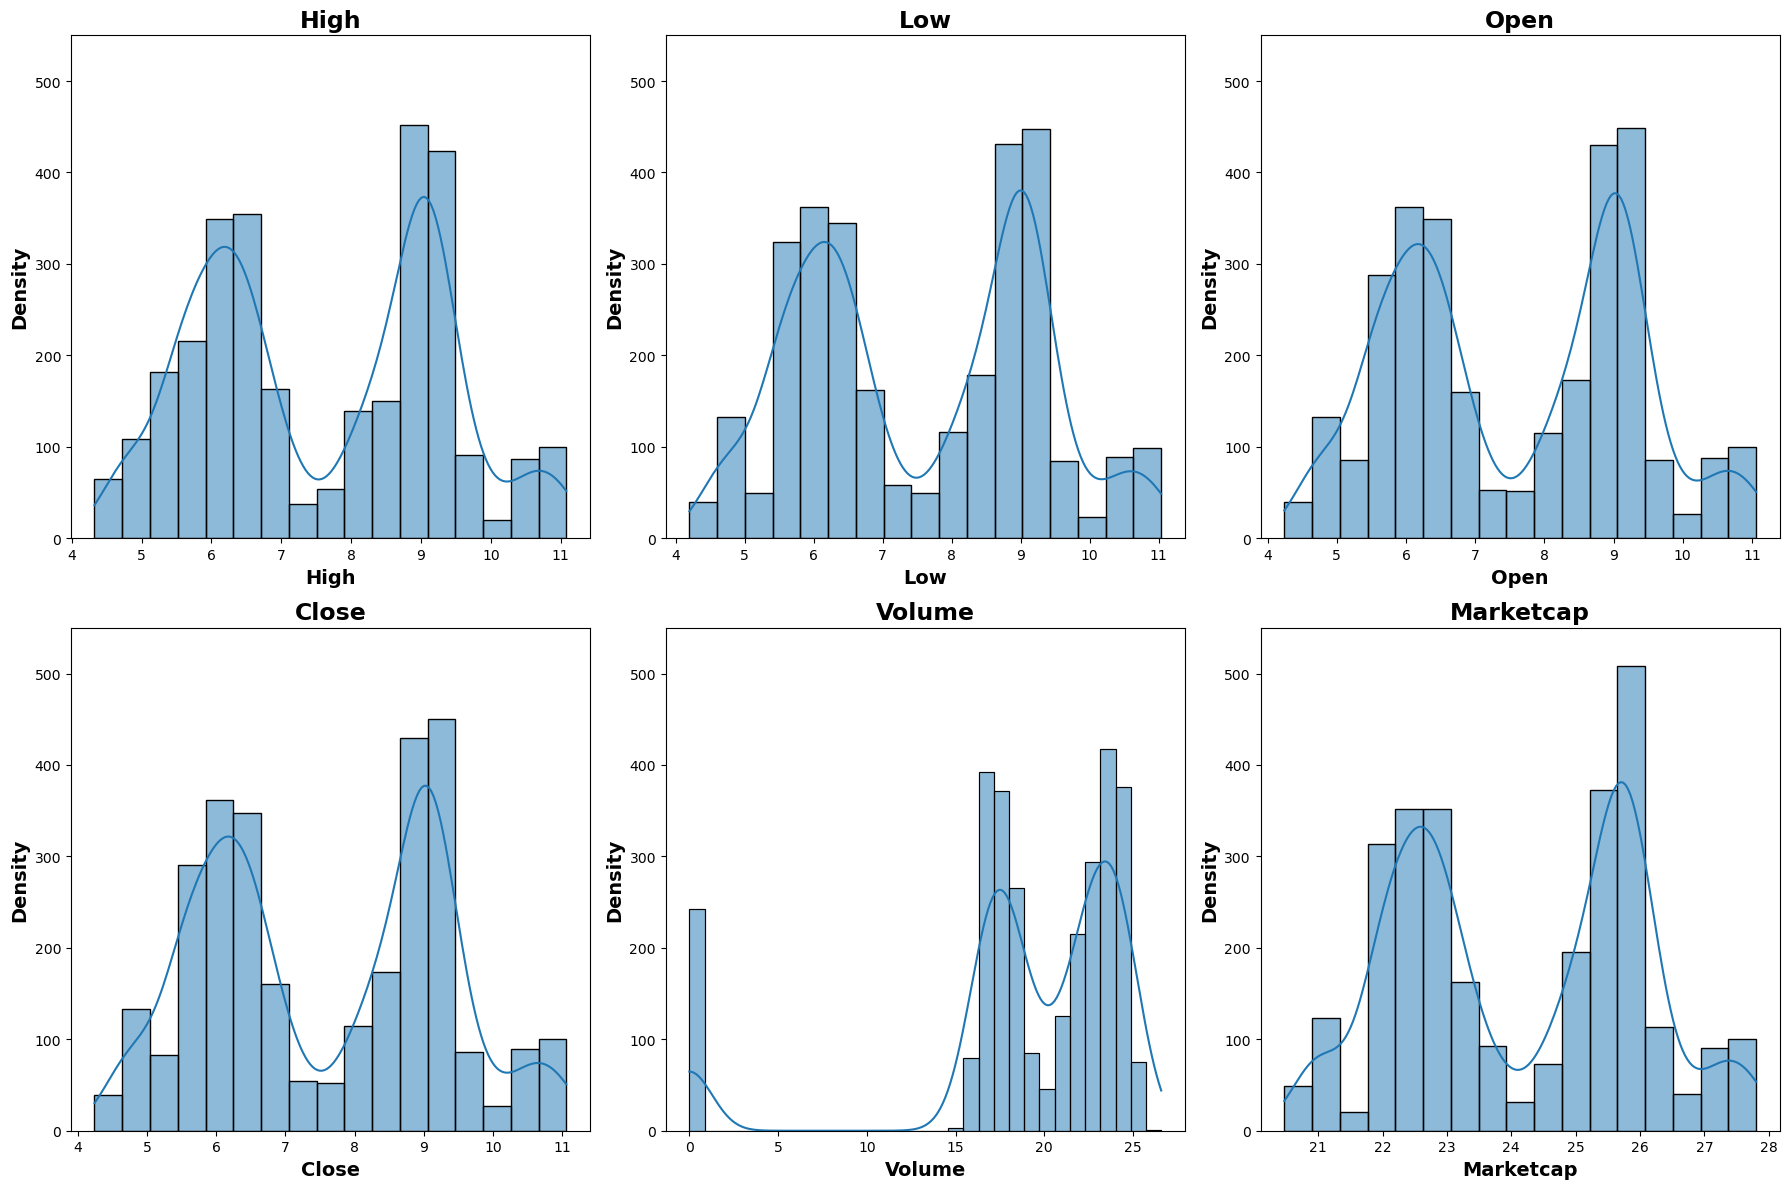

In [18]:
def numerical_columns_distributions(dataset):
    """This function is responsible for plotting the distributions of numerical columns in the dataset in a grid formation."""
    # calculate the number of rows needed to plot all numerical columns
    num_rows = len(dataset.columns) // 3
    if len(dataset.columns) % 3 != 0:
        num_rows += 1

    # set up the figure and the axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))  
    for i, column in enumerate(dataset.columns):
        row = i // 3
        col = i % 3

        # create density plots of numerical columns
        sns.histplot(dataset[column], kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}', fontsize=17, fontweight='bold')
        axes[row, col].set_xlabel(column, fontsize=14, fontweight='bold')
        axes[row, col].set_ylabel('Density', fontsize=14, fontweight='bold')
        axes[row, col].set_ylim([0, 550])

    # remove empty subplots which were not used
    for i in range(len(dataset.columns), num_rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.savefig("2.Numerical_Data_Distribution.png", dpi=300)
    plt.show()
    
numerical_columns_distributions(unskewed_df)

#### Scatter Plot Relationship of Columns

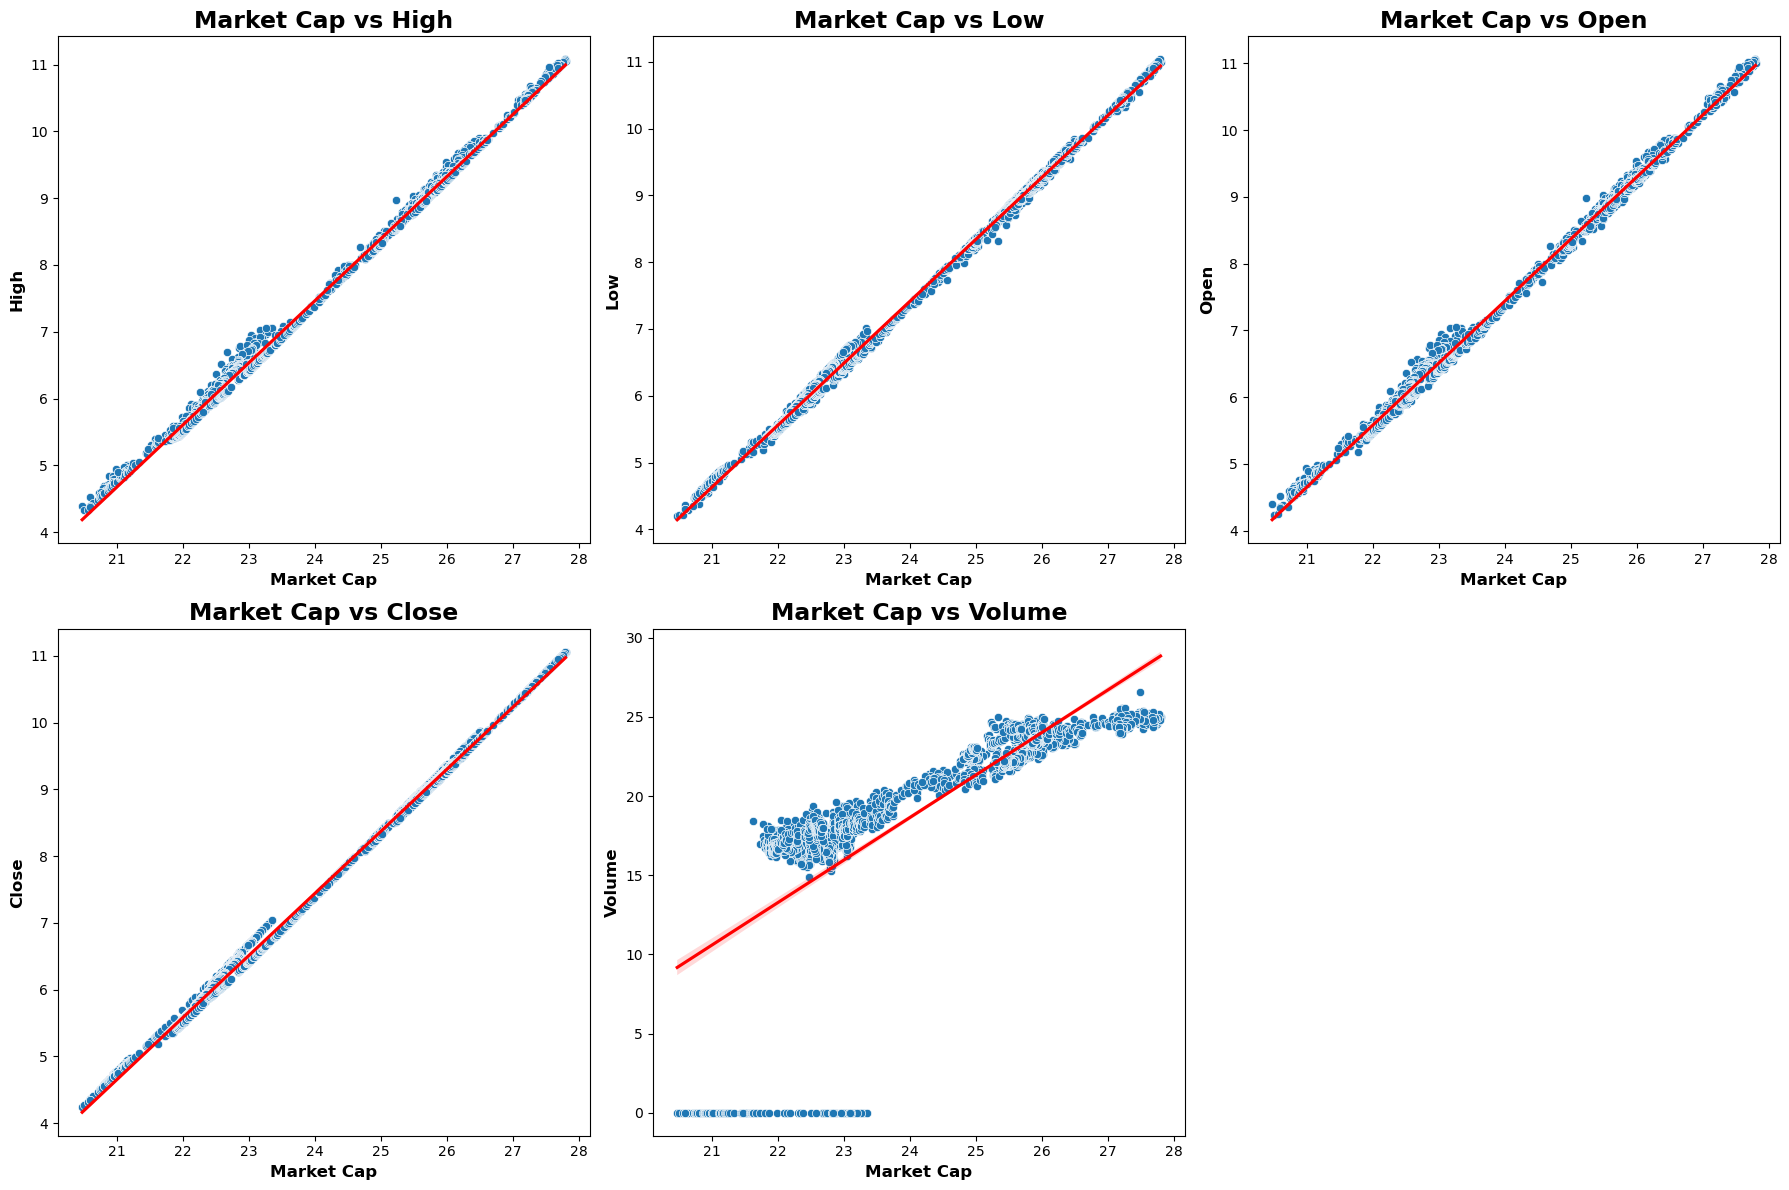

In [19]:
def scatter_plots_relationship(dataset):
    """This function is responsible for plotting the relationship of the target variable (marketcap) against all other variables."""
    columns = ['Marketcap', 'High', 'Low', 'Open', 'Close', 'Volume']
    
    # calculate the number of rows needed
    num_rows = len(columns[1:]) // 3
    if len(columns[1:]) % 3 != 0:
        num_rows += 1

    # setting up the figure and axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))  
    for i, column in enumerate(columns[1:]):
        row = i // 3
        col = i % 3
        
        sns.scatterplot(x = "Marketcap", y = column, data = dataset, ax = axes[row, col])
        sns.regplot(x = "Marketcap", y = column, data = dataset, scatter = False, ax = axes[row, col], color = 'red')
        axes[row, col].set_xlabel('Market Cap', fontsize = 12, fontweight = 'bold')
        axes[row, col].set_ylabel(column, fontsize = 12, fontweight = 'bold')
        axes[row, col].set_title(f'Market Cap vs {str.title(column)}', fontsize = 17, fontweight = 'bold')
        
    # remove empty subplots
    for i in range(len(columns[:-1]), num_rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])
        
    plt.tight_layout()
    plt.savefig('3.Scatter_Plots_of_MarketCap_vs_Other_Variables.png', dpi=300)
    plt.show()

scatter_plots_relationship(unskewed_df)

### Model Trainings and Evaluation

#### Elbow Method to Select Optimal Number of Clusters

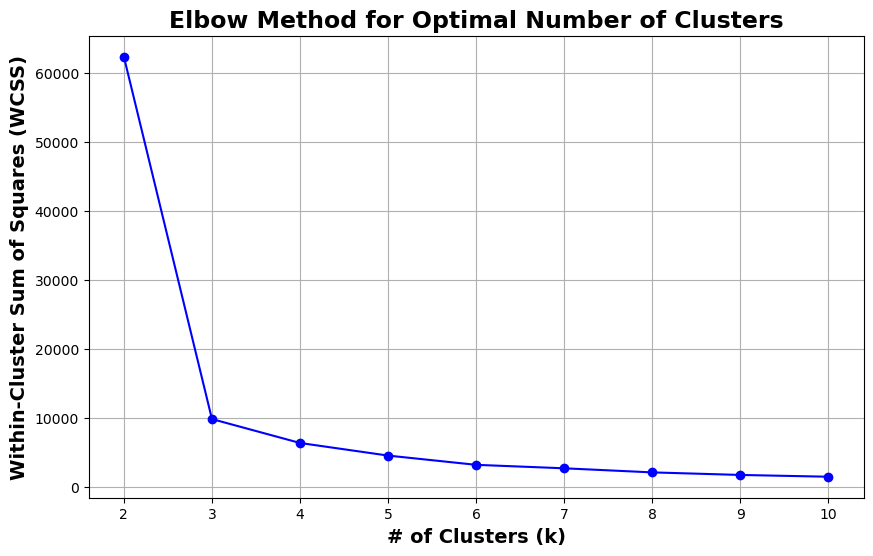

In [20]:
def elbow_method(dataset):
    """This function is responsible for calculating the optimal number of clusters for the K-Means clustering algorithm and returns the 
       k-values tested and the inertia values of the model for every K (cluster)."""
    # initialize lists to store inertia values
    inertia_values = []
    
    # test different values of k (clusters) 
    k_values = range(2, 11)  
    for k in k_values:
        # create KMeans clustering model
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(dataset)
    
        # append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    return k_values, inertia_values
    
k_values, inertia_values = elbow_method(unskewed_df)

# plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('# of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('4.Elbow_Method.png', dpi=300)
plt.show()

The optimal number of clusters in this case seems to be 3 as after 3, the line is starting to become extremely straight and there is a drop.

#### K-Means Model Creation

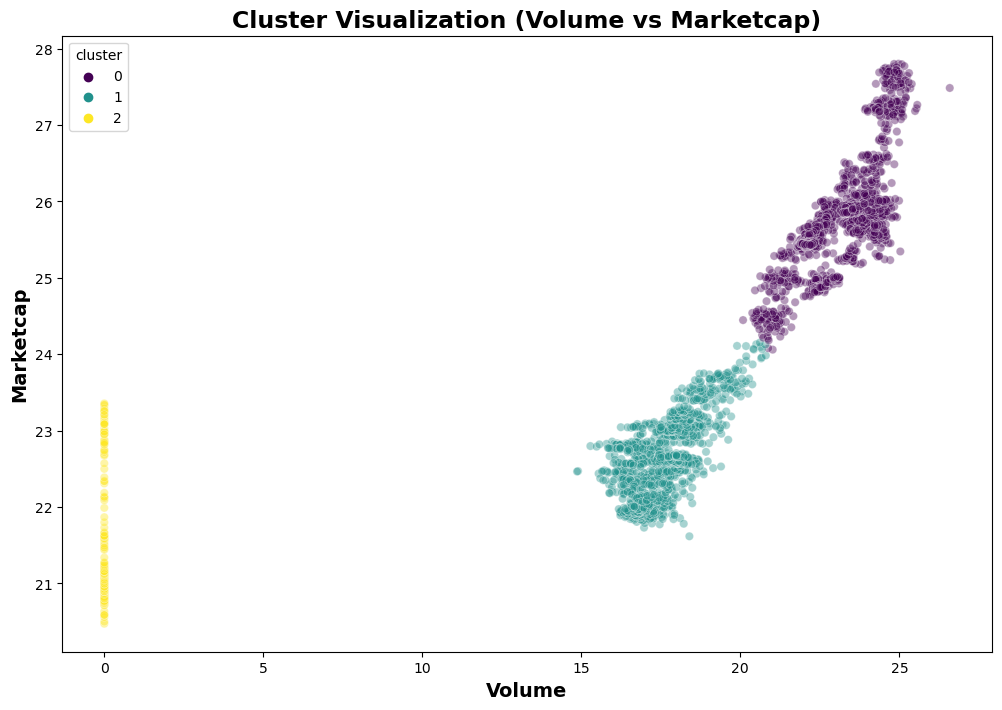

In [21]:
def k_means_modeling(dataset, clusters = 3):
    """This function is responsible for create a K-Means model on the given dataset and cluster number, and it returns the trained model."""
    # instantiate the KMeans model
    kmeans_model = KMeans(n_clusters = clusters)
    
    # fit the model to the scaled data
    kmeans_model.fit(dataset)

    return kmeans_model

kmeans_model = k_means_modeling(unskewed_df)

# add a cluster column in the reduced data
unskewed_df['cluster'] = kmeans_model.labels_

# Plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Volume', y = 'Marketcap', hue = 'cluster', data = unskewed_df, palette='viridis', alpha=0.4 )
plt.title('Cluster Visualization (Volume vs Marketcap)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Volume', fontsize=14, fontweight='bold')
plt.ylabel('Marketcap', fontsize=14, fontweight='bold')
plt.savefig("5.Cluster_Visualization_Volumne_vs_Marketcap.png")
plt.show()

In [22]:
# Example new data point(s) for prediction
new_data = pd.DataFrame({'High': [5.0, 4.99], 'Low': [4.9, 5], 'Open': [4.9, 4.9], 'Close': [4.98, 4.95], 
                         'Volume': [0, 0], 'Marketcap': [21, 22]})

# Use the trained K-means model to predict cluster labels for the new data
predicted_clusters = kmeans_model.predict(new_data)

# Display the predicted cluster labels for the new data points"
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 2
Predicted Cluster for New Data Point 2: 2


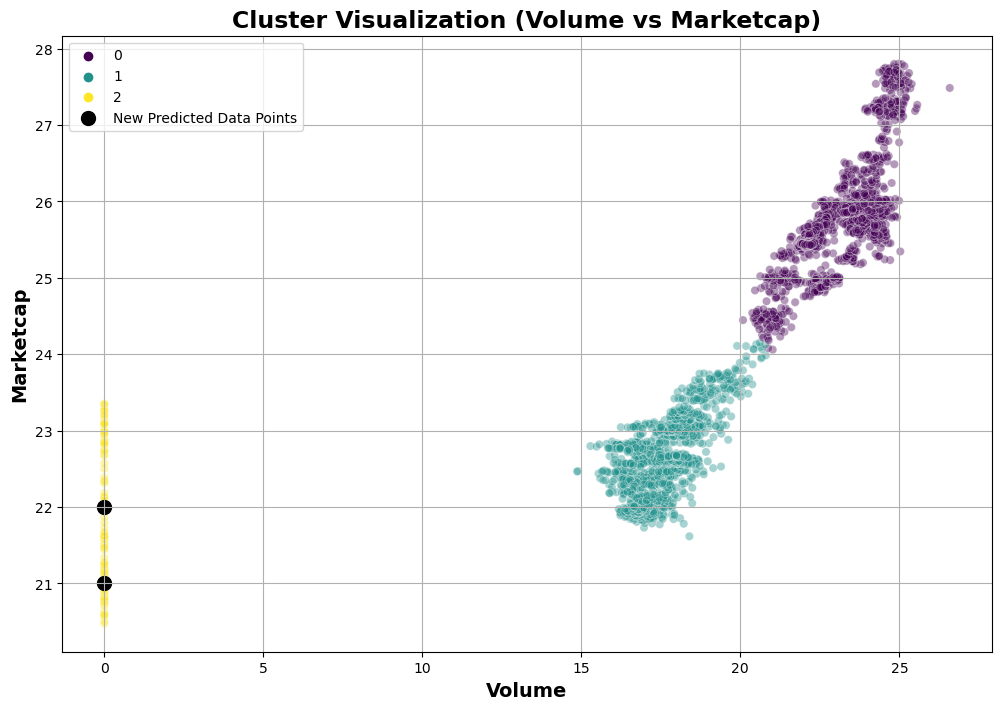

In [23]:
# plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Volume', y = 'Marketcap', hue = 'cluster', data = unskewed_df, palette='viridis', alpha=0.4 )

# plot the new predicted data points
plt.scatter(new_data['Volume'], new_data['Marketcap'], marker='o', s=100, c='black', label = 'New Predicted Data Points')

plt.title('Cluster Visualization (Volume vs Marketcap)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Volume', fontsize=14, fontweight='bold')
plt.ylabel('Marketcap', fontsize=14, fontweight='bold')
plt.savefig("6.Cluster_Visualization_Volumne_vs_Marketcap_2.png", dpi = 300)
plt.legend()
plt.grid(True)
plt.show()

#### Fitting Predictions

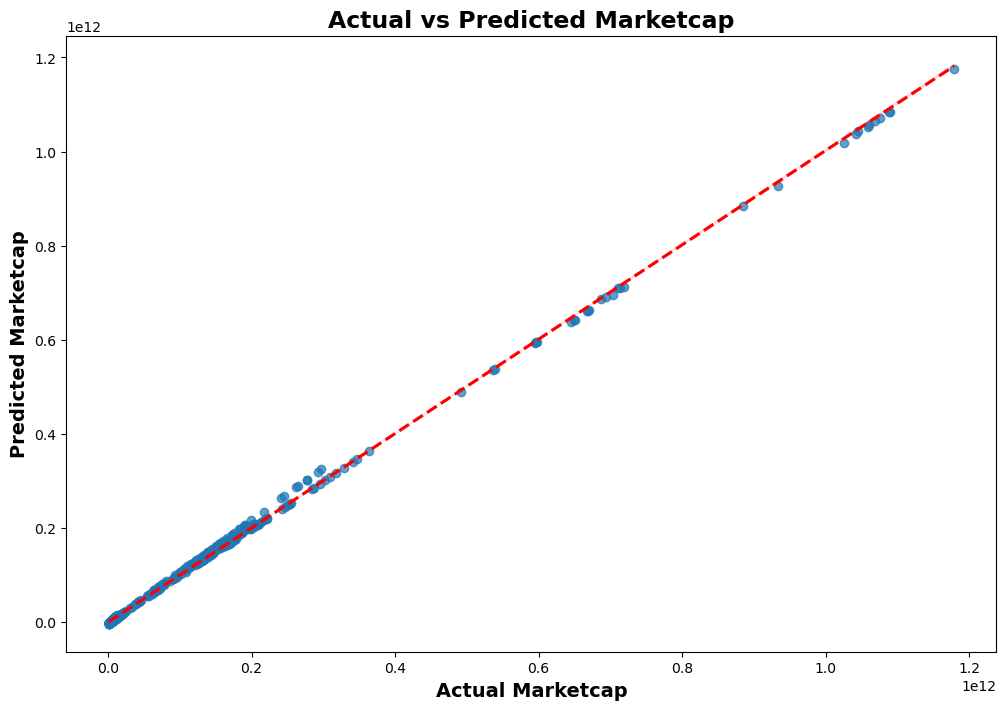

In [24]:
def linear_regression_fitting_predictions(X_train, y_train, X_test):    
    """This function takes in the training data and the testing data, and trains a linear regression model on it. It then returns the trained model
       and the predictions made on the test data"""
    # initialize Linear Regression model
    LR_model = LinearRegression()
    
    # fit the model on the training data
    LR_model.fit(X_train, y_train)

    # predict on the test data
    y_pred = LR_model.predict(X_test)

    return LR_model, y_pred

# separate features (X) and target variable (y)
X = df.drop('Marketcap', axis=1)
y = df['Marketcap']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model, y_pred = linear_regression_fitting_predictions(X_train, y_train, X_test)

# plot the predicted vs actual values with confidence intervals
plt.figure(figsize=(12, 8))
sns.regplot(x = y_test, y = y_pred, scatter_kws={"alpha":0.7}, line_kws={"color":"red", "linestyle":"--"}, ci=95)
plt.title('Actual vs Predicted Marketcap', fontsize=17, fontweight='bold')
plt.xlabel('Actual Marketcap', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Marketcap', fontsize=14, fontweight='bold')
plt.savefig('7.Linear_Regression_on_Marketcap.png', dpi=300)
plt.show()

#### Linear Regression Evaluation

In [25]:
def evaluate_linear_regression_fitting_predictions(LR_model, y_test, y_pred):
    """This function takes in the regression model, the test data, and the predicted data, and prints the performance metrics which involve
       the model coefficients, model intercept, R-squared score, root mean squared error, mean absolute error."""
    # calculate the model's coefficients and intercept
    coefficients = LR_model.coef_
    intercept = LR_model.intercept_
    print(f'Coefficients {coefficients}')
    print(f'Intercept: {intercept}')
    
    # calculate r-squared score (accuracy)
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')
    
    # calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'RMSE: {rmse}')
    
    # calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE {mae}')

evaluate_linear_regression_fitting_predictions(LR_model, y_test, y_pred)

Coefficients [-1.07081484e+06  1.09630138e+06  1.94913287e+05  1.84302314e+07
  7.27696118e-02]
Intercept: -4612154425.773209
R2: 0.9992436736523189
RMSE: 5072680926.151801
MAE 3510382503.9709487
